In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd

In [20]:
import datetime as dt

In [26]:
#holiday dates
start_day = dt.date(2019,8,1)
wek = dt.timedelta(days=7)

end_day = start_day + wek
print("Holiday is from",start_day, "to", end_day)

Holiday is from 2019-08-01 to 2019-08-08


# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
#create engine for hawaii
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo =False)


In [30]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# We can view all of the classes that automap found
Base.classes.keys()

In [37]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [33]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [38]:
meas = engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

meas



[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

# Exploratory Climate Analysis

In [39]:

from sqlalchemy import inspect

inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [152]:
first_date = session.query(Measurement.date).order_by(Measurement.date).first()

first_date

('2010-01-01')

In [136]:
# get last12 months

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

('2017-08-23',)
2016-08-23


In [147]:


start_date = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date <= '2017-08-23').\
    order_by(Measurement.date).\
    group_by(Measurement.date).all()

start_date

[('USC00519397', '2010-01-01', 65.0),
 ('USC00519397', '2010-01-02', 63.0),
 ('USC00519397', '2010-01-03', 74.0),
 ('USC00519397', '2010-01-04', 76.0),
 ('USC00513117', '2010-01-05', 76.0),
 ('USC00519397', '2010-01-06', 73.0),
 ('USC00519397', '2010-01-07', 70.0),
 ('USC00519397', '2010-01-08', 64.0),
 ('USC00519397', '2010-01-09', 68.0),
 ('USC00519397', '2010-01-10', 73.0),
 ('USC00519397', '2010-01-11', 64.0),
 ('USC00519397', '2010-01-12', 61.0),
 ('USC00513117', '2010-01-13', 64.0),
 ('USC00519397', '2010-01-14', 66.0),
 ('USC00519397', '2010-01-15', 65.0),
 ('USC00519397', '2010-01-16', 68.0),
 ('USC00519397', '2010-01-17', 64.0),
 ('USC00519397', '2010-01-18', 72.0),
 ('USC00519397', '2010-01-19', 66.0),
 ('USC00519397', '2010-01-20', 66.0),
 ('USC00519397', '2010-01-21', 69.0),
 ('USC00519397', '2010-01-22', 67.0),
 ('USC00519397', '2010-01-23', 67.0),
 ('USC00519397', '2010-01-24', 71.0),
 ('USC00519397', '2010-01-25', 67.0),
 ('USC00519397', '2010-01-26', 76.0),
 ('USC005193

In [43]:

meas = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()


meas_table = pd.DataFrame(meas)

meas_table

meas_table.set_index('station').head()



meas_table


,station,date,tobs
0,USC00519397,2016-08-24,79.0
1,USC00513117,2016-08-24,76.0
2,USC00514830,2016-08-24,80.0
3,USC00517948,2016-08-24,78.0
4,USC00519523,2016-08-24,79.0
5,USC00519281,2016-08-24,77.0
6,USC00516128,2016-08-24,74.0
7,USC00519397,2016-08-25,80.0
8,USC00513117,2016-08-25,77.0
9,USC00514830,2016-08-25,81.0


In [44]:
# query to pull the last 12months of precipitation data
session = Session(engine)

prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

prcp

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [45]:
#last 12 months of precipitation data 
# Save the query results as a Pandas DataFrame and set the index to the date column


df = pd.DataFrame(prcp)

prcp_df = pd.DataFrame(df) 

prcp_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [ ]:
# reset the index to the date

prcp_df.set_index('date').head()

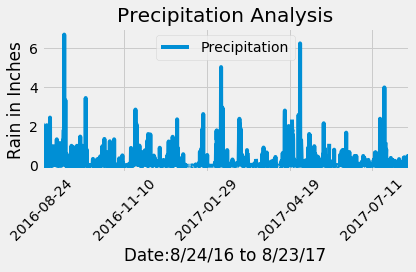

In [46]:
# Load the data from the query into a dataframe and plot the results

# plot the dataframe

ax = prcp_df.plot(x='date', y='prcp')
plt.xlabel("Date:8/24/16 to 8/23/17")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("Precipiation.jpg")
plt.show()




# Use Pandas Plotting with Matplotlib to plot the data


In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data

stats = prcp_df.describe()

stats_df = pd.DataFrame(stats) 

stats_df

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You may need to use functions such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.


In [48]:
# Design a query to show how many stations are available in this dataset?
#Use inspector to get col names 


inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])




id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [ ]:
session = Session(engine)

In [49]:
#calculate the total number of stations

station = session.query(Station.id, Station.station).\
    order_by(Station.id).all()

station


[(1, 'USC00519397'),
 (2, 'USC00513117'),
 (3, 'USC00514830'),
 (4, 'USC00517948'),
 (5, 'USC00518838'),
 (6, 'USC00519523'),
 (7, 'USC00519281'),
 (8, 'USC00511918'),
 (9, 'USC00516128')]

In [50]:
Total_number_stations= len(station)
print("Total_number_stations is", Total_number_stations)

Total_number_stations is 9


In [51]:

stations = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

stations

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#Design a query to find the most active stations

active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

most_active = active_stations[0][0]    
print("The most active Station was",most_active,"with",active_stations[0][1],"weather observations.")
print()
print("Stations (in descending order) with their number of observations:")
for station, count in active_stations:
    print("Station",station,"had",count, "weather observations.")





The most active Station was USC00519281 with 2772 weather observations.

Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [63]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).


tobs = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

tobs



[('USC00519397', '2016-08-24', 79.0),
 ('USC00513117', '2016-08-24', 76.0),
 ('USC00514830', '2016-08-24', 80.0),
 ('USC00517948', '2016-08-24', 78.0),
 ('USC00519523', '2016-08-24', 79.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00516128', '2016-08-24', 74.0),
 ('USC00519397', '2016-08-25', 80.0),
 ('USC00513117', '2016-08-25', 77.0),
 ('USC00514830', '2016-08-25', 81.0),
 ('USC00517948', '2016-08-25', 81.0),
 ('USC00519523', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00516128', '2016-08-25', 77.0),
 ('USC00519397', '2016-08-26', 79.0),
 ('USC00513117', '2016-08-26', 78.0),
 ('USC00514830', '2016-08-26', 81.0),
 ('USC00517948', '2016-08-26', 81.0),
 ('USC00519523', '2016-08-26', 84.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519397', '2016-08-27', 77.0),
 ('USC00513117', '2016-08-27', 73.0),
 ('USC00514830', '2016-08-27', 81.0),
 ('USC00519523', '2016-08-27', 81.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00516128', '2016-08-27', 74.0),
 ('USC005193

In [92]:
#Filter by the station with the highest number of observations in the last 12 months

obs = [Measurement.station,Measurement.date,
      func.max(Measurement.tobs)]
          

high_obs = session.query(*obs).\
        filter(func.strftime(Measurement.date) > last_year).\
        filter(Measurement.tobs).\
        group_by(Measurement.date).\
        order_by((Measurement.station).desc()).all()

print('Stations with the highest number of observations in the last year:')

high_obs


# hist_df=pd.DataFrame(high_obs)

#Plot the results as a histogram 

#    filter(Measurements.station == busiest).\
#     filter(Measurements.date > last_year).\

Stations with the highest number of observations in the last year:


[('USC00519523', '2016-08-26', 84.0),
 ('USC00519523', '2016-09-04', 84.0),
 ('USC00519523', '2016-09-05', 84.0),
 ('USC00519523', '2016-09-11', 83.0),
 ('USC00519523', '2016-09-17', 81.0),
 ('USC00519523', '2016-09-22', 79.0),
 ('USC00519523', '2016-09-24', 83.0),
 ('USC00519523', '2016-09-29', 82.0),
 ('USC00519523', '2016-10-02', 81.0),
 ('USC00519523', '2016-10-08', 82.0),
 ('USC00519523', '2016-10-09', 80.0),
 ('USC00519523', '2016-10-10', 78.0),
 ('USC00519523', '2016-10-11', 81.0),
 ('USC00519523', '2016-10-12', 81.0),
 ('USC00519523', '2016-10-16', 81.0),
 ('USC00519523', '2016-10-21', 79.0),
 ('USC00519523', '2016-10-22', 80.0),
 ('USC00519523', '2016-10-23', 81.0),
 ('USC00519523', '2016-10-29', 78.0),
 ('USC00519523', '2016-10-30', 79.0),
 ('USC00519523', '2016-10-31', 78.0),
 ('USC00519523', '2016-11-01', 79.0),
 ('USC00519523', '2016-11-05', 78.0),
 ('USC00519523', '2016-11-07', 76.0),
 ('USC00519523', '2016-11-08', 77.0),
 ('USC00519523', '2016-11-12', 79.0),
 ('USC005195

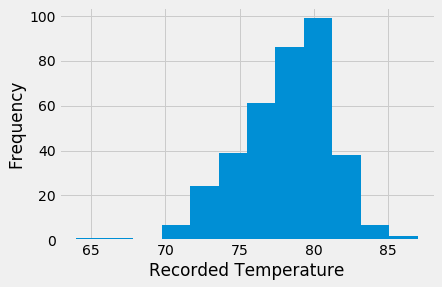

In [99]:
#high_obs.to_csv("High_obs.csv")

#df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])


hist_df=pd.DataFrame(high_obs,columns=['Station', 'Date', 'Tobs'])

hist_df


plt.hist(hist_df['Tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")                                       

plt.savefig("Total observations in 12 months.jpg")
plt.show()

#  * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

In [166]:
start_date = dt.datetime(2010,1,1)

temps = [Measurement.station,
         func.avg(Measurement.tobs),
         func.min(Measurement.tobs),
         func.max(Measurement.tobs)]
tem_start = session.query(*temps).\
       filter(Measurement.date >= start_date).\
       group_by(Measurement.station).\
       order_by(Measurement.station).all()

tem_start


[('USC00511918', 71.61880687563195, 53.0, 87.0),
 ('USC00513117', 72.69128508124076, 59.0, 85.0),
 ('USC00514830', 74.8732970027248, 58.0, 85.0),
 ('USC00516128', 70.91420911528151, 58.0, 84.0),
 ('USC00517948', 74.68440233236151, 58.0, 87.0),
 ('USC00518838', 72.72549019607843, 58.0, 83.0),
 ('USC00519281', 71.66438108985926, 54.0, 85.0),
 ('USC00519397', 74.55673889092913, 56.0, 87.0),
 ('USC00519523', 74.54347826086956, 56.0, 85.0)]

In [155]:
#When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date

temps = [Measurement.station,
         func.avg(Measurement.tobs),
         func.min(Measurement.tobs),
         func.max(Measurement.tobs)]
temp_start = session.query(*temps).\
       filter(Measurement.date >= '2017-01-01').\
       group_by(Measurement.station).\
       order_by(Measurement.station).all()

temp_start



[('USC00513117', 72.48584905660377, 61.0, 82.0),
 ('USC00514830', 76.94358974358974, 63.0, 83.0),
 ('USC00516128', 72.04504504504504, 58.0, 82.0),
 ('USC00517948', 74.05607476635514, 62.0, 87.0),
 ('USC00519281', 72.1447963800905, 59.0, 83.0),
 ('USC00519397', 74.92608695652174, 60.0, 87.0),
 ('USC00519523', 76.72857142857143, 60.0, 85.0)]

In [122]:
#Design a query to retrieve temperature observation data (tobs) btwn 2 dates



dobs = [Measurement.station,
         func.avg(Measurement.tobs),
         func.min(Measurement.tobs),
         func.max(Measurement.tobs)]
temp_week = session.query(*dobs).\
       filter(Measurement.date.between ("2017-01-01", "2017-08-01")).\
       group_by(Measurement.station).\
       order_by(Measurement.station).all()

temp_week


[('USC00513117', 72.48584905660377, 61.0, 82.0),
 ('USC00514830', 76.56818181818181, 63.0, 83.0),
 ('USC00516128', 71.70646766169155, 58.0, 82.0),
 ('USC00517948', 74.05607476635514, 62.0, 87.0),
 ('USC00519281', 71.88679245283019, 59.0, 82.0),
 ('USC00519397', 74.47142857142858, 60.0, 87.0),
 ('USC00519523', 76.27604166666667, 60.0, 84.0)]

In [118]:
# last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(last_year)


week_start = dt.date(2017,1,8) - dt.timedelta(days = 7)

print(week_start)

week_end = dt.date(2017,1,1) + dt.timedelta(days = 7)

print(week_end)



dates = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
        filter(Measurement.date > 'week_start').\
        filter(Measurement.date <'week_end').\
        order_by(Measurement.date).all()           

dates

2017-01-01
2017-01-08


[]

# Temperature Analysis I
Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

In [123]:
jun = [Measurement.station,
         func.avg(Measurement.tobs),
         func.min(Measurement.tobs),
         func.max(Measurement.tobs)]
jun_temps = session.query(*dobs).\
       filter(func.strftime("%m", Measurement.date) == "06").\
       group_by(Measurement.station).\
       order_by(Measurement.station).all()

jun_temps

[('USC00511918', 74.13939393939394, 66.0, 85.0),
 ('USC00513117', 74.05084745762711, 68.0, 83.0),
 ('USC00514830', 76.00537634408602, 67.0, 81.0),
 ('USC00516128', 71.9372197309417, 66.0, 79.0),
 ('USC00517948', 76.6554054054054, 64.0, 82.0),
 ('USC00518838', 73.39473684210526, 67.0, 78.0),
 ('USC00519281', 73.27118644067797, 65.0, 82.0),
 ('USC00519397', 77.55932203389831, 70.0, 84.0),
 ('USC00519523', 76.66810344827586, 71.0, 82.0)]

In [124]:
dec = [Measurement.station,
         func.avg(Measurement.tobs),
         func.min(Measurement.tobs),
         func.max(Measurement.tobs)]
dec_temps = session.query(*dobs).\
       filter(func.strftime("%m", Measurement.date) == "12").\
       group_by(Measurement.station).\
       order_by(Measurement.station).all()

dec_temps

[('USC00511918', 69.6842105263158, 57.0, 81.0),
 ('USC00513117', 71.06944444444444, 63.0, 80.0),
 ('USC00514830', 73.2247191011236, 62.0, 79.0),
 ('USC00516128', 69.29126213592232, 60.0, 83.0),
 ('USC00517948', 71.8348623853211, 64.0, 82.0),
 ('USC00518838', 72.42105263157895, 63.0, 78.0),
 ('USC00519281', 69.90322580645162, 58.0, 79.0),
 ('USC00519397', 71.10952380952381, 56.0, 77.0),
 ('USC00519523', 72.43333333333334, 56.0, 79.0)]

In [ ]:
Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?
Average temperatures for June and December are not very significantly different

In [100]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [23]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [24]:
# Plot the daily normals as an area plot with `stacked=False`
